In [1]:
import json

with open('cluster_idx.json', 'r') as jsonfile:
    cluster_idx = json.load(jsonfile)

print(cluster_idx['1'])

[848, 849, 894, 1144, 1901, 1915, 1978, 2147, 2829, 3112, 3389, 3668, 4240, 4687, 4998, 5309, 5415, 6132, 6186, 6720, 7121, 7410, 7724, 7812, 7969, 8250, 8494, 9880, 9994, 10143, 11761, 11951, 11968, 12355, 12661, 12976, 13270, 15105, 15428, 16252, 16775, 17011, 17219, 17622, 17711, 19115, 19447, 20030, 20135, 20677, 21417, 21890, 21986, 22477, 22696, 23167]


In [2]:
import sys
sys.path.append("/home/daniel/ml_workspace/circuit-finder")

In [3]:
from circuit_finder.neuronpedia import get_neuronpedia_url_for_quick_list

c1_features = cluster_idx['1']
layer = 11

url = get_neuronpedia_url_for_quick_list(layer, c1_features, "tres-dc")
print(url)


https://neuronpedia.org/quick-list/?name=temporary_list&features=%5B%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%22848%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%22849%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%22894%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%221144%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%221901%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%221915%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%221978%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%2

In [4]:
c2_features = cluster_idx['2']
layer = 11

url = get_neuronpedia_url_for_quick_list(layer, c2_features, "tres-dc")
print(url)

https://neuronpedia.org/quick-list/?name=temporary_list&features=%5B%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%22499%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%22680%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%22685%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%22730%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%221012%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%221199%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%221329%22%7D%2C%20%7B%22modelId%22%3A%20%22gpt2-small%22%2C%20%22layer%22%3A%20%2211-tres-dc%22%2C%20%22index%22%3A%20%22

In [5]:
from circuit_finder.pretrained import load_model
model = load_model()

/home/daniel/ml_workspace/circuit-finder/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loaded pretrained model gpt2 into HookedTransformer


In [6]:
from transformer_lens.utils import test_prompt 

text = "Live: https://www.youtube.com/watch?v=9RE-"
corrupt_text = "When John and Mary went to the shop, John gave a bottle of milk to"

tokens = model.to_tokens(text)

print(tokens.shape)
print(model.to_str_tokens(tokens))

clean_tokens = tokens[:, :-1]
corrupt_tokens = model.to_tokens(corrupt_text)
answer_tokens = tokens[:, -1]
prompt = model.to_string(clean_tokens)
answer = model.to_string(answer_tokens)
print(clean_tokens.shape)
print(corrupt_tokens.shape)

test_prompt(prompt, answer, model, prepend_space_to_answer=False)

torch.Size([1, 18])
['<|endoftext|>', 'Live', ':', ' https', '://', 'www', '.', 'youtube', '.', 'com', '/', 'watch', '?', 'v', '=', '9', 'RE', '-']
torch.Size([1, 17])
torch.Size([1, 17])
Tokenized prompt: [['<|endoftext|>', '<|endoftext|>', 'Live', ':', ' https', '://', 'www', '.', 'youtube', '.', 'com', '/', 'watch', '?', 'v', '=', '9', 'RE']]
Tokenized answer: ['-']


Performance on answer token:
Rank: 64       Logit:  8.59 Prob:  0.19% Token: |-|

Top 0th token. Logit: 12.07 Prob:  6.23% Token: |
|
Top 1th token. Logit: 11.57 Prob:  3.77% Token: |The|
Top 2th token. Logit: 11.12 Prob:  2.41% Token: |"|
Top 3th token. Logit: 10.90 Prob:  1.94% Token: |A|
Top 4th token. Logit: 10.85 Prob:  1.83% Token: |I|
Top 5th token. Logit: 10.39 Prob:  1.16% Token: |In|
Top 6th token. Logit: 10.36 Prob:  1.13% Token: |.|
Top 7th token. Logit: 10.15 Prob:  0.91% Token: |It|
Top 8th token. Logit: 10.10 Prob:  0.87% Token: |S|
Top 9th token. Logit:  9.99 Prob:  0.78% Token: |This|


Ranks of the answer tokens: [('-', 64)]

In [7]:
from circuit_finder.pretrained import load_attn_saes, load_hooked_mlp_transcoders
from circuit_finder.patching.indirect_leap import preprocess_attn_saes

attn_sae_dict = load_attn_saes()
attn_sae_dict = preprocess_attn_saes(attn_sae_dict, model)
hooked_mlp_transcoder_dict = load_hooked_mlp_transcoders()

attn_saes = list(attn_sae_dict.values())
transcoders = list(hooked_mlp_transcoder_dict.values())


Fetching 26 files:   0%|          | 0/26 [00:00<?, ?it/s]

In [15]:
import torch
from circuit_finder.patching.eap_graph import EAPGraph
from circuit_finder.patching.ablate import get_metric_with_ablation
from circuit_finder.patching.indirect_leap import IndirectLEAP, LEAPConfig
from circuit_finder.utils import clear_memory

ablate_tokens = corrupt_tokens

def metric_fn(model, tokens):
    logits = model(tokens)
    logprobs = torch.nn.functional.log_softmax(logits, dim=-1)
    entropy = -torch.sum(logprobs * torch.exp(logprobs), dim=-1)
    return entropy[:, -1].mean()

# NOTE: First, get the ceiling of the patching metric.
# TODO: Replace 'last_token_logit' with logit difference
with torch.no_grad():
    ceiling = metric_fn(model, clean_tokens).item()

# NOTE: Second, get floor of patching metric using empty graph, i.e. ablate everything
with torch.no_grad():
    empty_graph = EAPGraph([])
    floor = get_metric_with_ablation(
        model,
        empty_graph,
        clean_tokens,
        metric_fn,
        hooked_mlp_transcoder_dict,
        attn_sae_dict,
        ablate_errors=False,  # Do not ablate errors when running forward pass
        first_ablated_layer=2,
    ).item()
clear_memory()

# now sweep over thresholds to get graphs with variety of numbers of nodes
# for each graph we calculate faithfulness
num_nodes_list = []
metrics_list = []

# Sweep over thresholds
# TODO: make configurable
# thresholds = [0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.0]
thresholds = [0.0003]
for threshold in thresholds:
    # Setup LEAP algorithm
    model.reset_hooks()
    cfg = LEAPConfig(
        threshold=threshold, contrast_pairs=False, chained_attribs=True
    )
    leap = IndirectLEAP(
        cfg=cfg,
        tokens=clean_tokens,
        model=model,
        metric=metric_fn,
        attn_saes=attn_saes,  # type: ignore
        transcoders=transcoders,
        corrupt_tokens=corrupt_tokens,
    )

    # Populate the graph
    leap.metric_step()
    for layer in reversed(range(1, leap.n_layers)):
        leap.mlp_step(layer)
        leap.ov_step(layer)

    # Save the graph
    graph = EAPGraph(leap.graph)
    num_nodes = len(graph.get_src_nodes())

    # Delete tensors to save memory
    del leap
    clear_memory()

    # Calculate the metric under ablation
    with torch.no_grad():
        metric = get_metric_with_ablation(
            model,
            graph,
            ablate_tokens,
            metric_fn,
            hooked_mlp_transcoder_dict,
            attn_sae_dict,
            ablate_errors=False,
            first_ablated_layer=2
        ).item()

In [16]:
print(len(graph.get_edges()))

2362


In [30]:
from circuit_finder.core.types import parse_node_name

num_entropy_features = 0
num_anti_entropy_features = 0
active_entropy_features = set()
active_anti_entropy_features = set()
for node in graph.get_src_nodes():
    module_name, layer, token_idx, feature_idx = parse_node_name(node)
    if module_name == "mlp" and layer == 11:
        if feature_idx in c1_features:
            num_entropy_features += 1
            active_entropy_features.add(feature_idx)
        elif feature_idx in c2_features:
            num_anti_entropy_features += 1
            active_anti_entropy_features.add(feature_idx)
    else:
        continue

print(len(active_entropy_features))
print(active_entropy_features)

48
{15105, 21890, 7812, 4998, 16775, 9994, 2829, 4240, 9880, 10143, 7969, 20135, 22696, 21417, 3112, 19115, 5415, 6186, 7724, 11951, 12976, 17711, 8494, 1978, 8250, 5309, 6720, 12355, 15428, 17219, 20677, 4687, 848, 7121, 3668, 13270, 17622, 21986, 2147, 1901, 11761, 7410, 6132, 12661, 1144, 1915, 16252, 894}


In [17]:
from circuit_finder.plotting import make_html_graph

make_html_graph(graph, tokens = model.to_str_tokens(clean_tokens))

graph.html
Generated graph.html. Open this file in Live Server to view the graph.


In [31]:
import requests
import asyncio
from typing import Any

NEURONPEDIA_DOMAIN = "https://neuronpedia.org"

async def get_neuronpedia_feature(
    feature: int, layer: int, model: str = "gpt2-small", dataset: str = "res-jb"
) -> dict[str, Any]:
    """Fetch a feature from Neuronpedia API."""
    url = f"{NEURONPEDIA_DOMAIN}/api/feature/{model}/{layer}-{dataset}/{feature}"
    result = requests.get(url).json()
    result["index"] = int(result["index"])
    await return result

feature_info = get_neuronpedia_feature(feature = 20677, layer = 11, dataset = "tres-dc")
print(feature_info.keys())

dict_keys(['modelId', 'layer', 'index', 'sourceSetName', 'creatorId', 'createdAt', 'maxActApprox', 'neuron_alignment_indices', 'neuron_alignment_values', 'neuron_alignment_l1', 'correlated_neurons_indices', 'correlated_neurons_pearson', 'correlated_neurons_l1', 'correlated_features_indices', 'correlated_features_pearson', 'correlated_features_l1', 'neg_str', 'neg_values', 'pos_str', 'pos_values', 'frac_nonzero', 'freq_hist_data_bar_heights', 'freq_hist_data_bar_values', 'logits_hist_data_bar_heights', 'logits_hist_data_bar_values', 'num_tokens_for_dashboard', 'decoder_weights_dist', 'umap_cluster', 'umap_log_feature_sparsity', 'umap_x', 'umap_y', 'model', 'lists', 'sourceSet', 'activations', 'explanations', 'comments'])


In [32]:
print(feature_info['frac_nonzero'])

0.3840457153320312


In [34]:
feature_infos = {}
for feature in active_entropy_features:
    feature_info = get_neuronpedia_feature(feature, layer = 11, dataset = "tres-dc")
    feature_infos[feature] = feature_info

print(len(feature_infos))

48


In [51]:
import math

feature_indices = []
feature_log_act_density = []

for feature_idx, feature_info in feature_infos.items():
    feature_indices.append(feature_idx)
    log_act_density = - math.log(feature_info['frac_nonzero'], 10)
    feature_log_act_density.append(log_act_density)

Text(0.5, 0, '-log(Activation Density)')

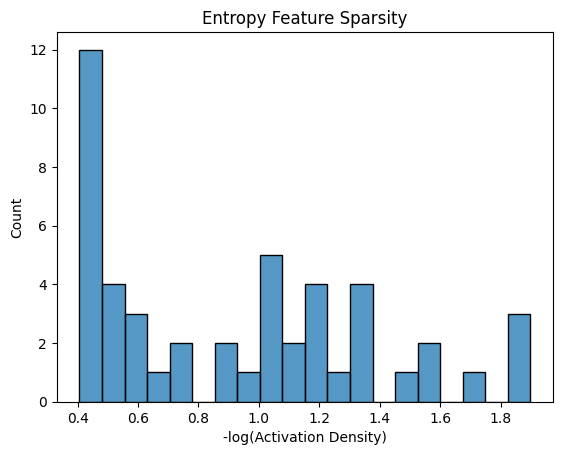

In [54]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.histplot(feature_log_act_density, bins=20)
plt.title("Entropy Feature Sparsity")
plt.xlabel("-log(Activation Density)")